In [48]:


import keras

Note: you may need to restart the kernel to use updated packages.


In [49]:
from keras.models import Sequential


In [50]:
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D,Convolution2D, MaxPool2D,MaxPooling2D, AvgPool2D, BatchNormalization, Reshape

In [51]:
from keras.preprocessing.image import ImageDataGenerator

In [52]:
from keras.callbacks import LearningRateScheduler

In [59]:

model = Sequential()
model.add(Conv2D(32, (3, 3), border_mode='same',
                          input_shape=(32,32,3)))
model.add(Activation('relu'))
  

model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2))
#model.add(Dropout(0.5))
  
  # Add another convolution layer:
model.add(Conv2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
  
  # And yet another:
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=2))
#model.add(Dropout(0.5))
  
  # Add a fully-connected layer:
model.add(Flatten())
model.add(Dense(43))
model.add(Activation('relu'))
model.add(Dropout(0.5))
  
  # Add a final softmax output layer:
model.add(Dense(43))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [60]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 15

In [61]:
import pickle

In [62]:
with open('OrgSet2_rgb.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')

In [63]:

data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)

# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

# Showing loaded data from file
for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)

x_train: (34799, 32, 32, 3)
y_train: (34799, 43)
x_validation: (4410, 32, 32, 3)
y_validation: (4410, 43)
x_test: (12630, 32, 32, 3)
y_test: (12630,)
labels: 43


In [64]:

h = model.fit(data['x_train'][:540], data['y_train'][:540],
              batch_size=5, epochs = epochs,
              validation_data = (data['x_validation'], data['y_validation']),
              callbacks=[annealer], verbose=1)

Train on 540 samples, validate on 4410 samples
Epoch 1/15
540/540 [==============================] - 8s 15ms/step - loss: 3.6614 - accuracy: 0.0630 - val_loss: 3.6383 - val_accuracy: 0.0542
Epoch 2/15
540/540 [==============================] - 9s 16ms/step - loss: 3.5818 - accuracy: 0.0685 - val_loss: 3.5155 - val_accuracy: 0.0755
Epoch 3/15
540/540 [==============================] - 9s 16ms/step - loss: 3.4356 - accuracy: 0.0907 - val_loss: 3.3784 - val_accuracy: 0.1524
Epoch 4/15
540/540 [==============================] - 8s 14ms/step - loss: 3.2409 - accuracy: 0.1759 - val_loss: 3.1822 - val_accuracy: 0.2020
Epoch 5/15
540/540 [==============================] - 7s 14ms/step - loss: 2.9557 - accuracy: 0.2333 - val_loss: 2.9801 - val_accuracy: 0.2084
Epoch 6/15
540/540 [==============================] - 8s 14ms/step - loss: 2.7519 - accuracy: 0.2556 - val_loss: 2.7271 - val_accuracy: 0.3077
Epoch 7/15
540/540 [==============================] - 8s 15ms/step - loss: 2.5463 - accuracy: 0

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
Y_pred = model.predict(data['x_validation'])
y_pred = np.argmax(Y_pred, axis=1)
y_val = np.argmax(data['y_validation'],axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_val, y_pred))
print('Classification Report')
#target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(y_val, y_pred))

Confusion Matrix
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 0 5]
 [0 0 0 ... 0 0 0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.08      0.20      0.11        10
           5       0.50      0.10      0.17        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.10      0.80      0.17        10
           9       0.00      0.00      0.00        10
          10       1.00      0.10      0.18        10
          11       0.00      0.00      0.00        10
          12       0.80      0.40      0.53        10
          13       0.27      0.30      0.29        10
          14       0.23      0

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
import matplotlib.pyplot as plt

In [36]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(43):
    fpr[i], tpr[i], _ = roc_curve(data['y_validation'][:,i], Y_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(data['y_validation'].ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

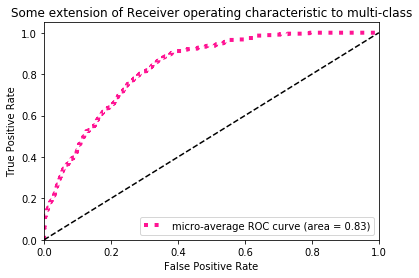

In [37]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(43)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(43):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 43

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

'''
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
'''
'''
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(43), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    '''

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [38]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(43):
    precision[i], recall[i], _ = precision_recall_curve(data['y_validation'][:,i], Y_pred[:,i])
    average_precision[i] = average_precision_score(data['y_validation'][:,i], Y_pred[:,i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(data['y_validation'].ravel(),
    Y_pred.ravel())
average_precision["micro"] = average_precision_score(data['y_validation'], Y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.16


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.16')

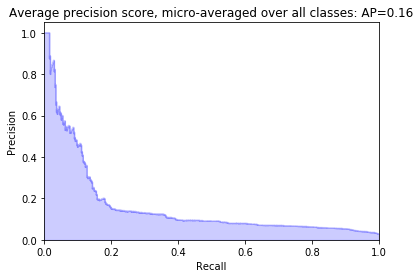

In [39]:
from inspect import signature
# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})


plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))